# Adoption Data #

This data is from Trends in Foster Care and Adoption: FY 2010-2019 U.S. Department of Health and Human Services, Administration for Children and Families, Children's Bureau (2018). We isolate three specific datasets: waiting for adoption, parental rights terminated, and adopted.

Waiting for Adoption: This is an estimated count of all children who are waiting to be adopted on the last day of the FFY. An individual child is included in the count for each year in which he or she is waiting to be adopted on the last day. There is no Federal definition for children waiting to be adopted. For the purposes of this analysis, children waiting to be adopted include children with a goal of adoption and/or whose parental rights have been terminated. The “waiting” population excludes children whose parents' rights have been terminated, who are 16 years old and older, and who have a goal of emancipation. An individual child is included in the count for each year that he or she has these characteristics on the last day of the year.

Parental Rights Terminated: This is an estimated count of all children in care on the last day of the FFY whose parental rights have been terminated and who are waiting for adoption. An individual child who has these characteristics on the last day of the year is counted only once for that year. 

Adopted:This is an estimated count of all children adopted with public child welfare agency involvement during the FFY. An individual child is counted only once for each year, even if (in rare cases) the child was adopted multiple times during the year. In cases when an individual child is adopted in one year and then adopted again in a subsequent year, he or she is included in the count of adoptions for both years.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
waitingAdoption = pd.read_csv("../raw_data/waitingForAdoption.csv")
parenRightsTerm = pd.read_csv("../raw_data/parentalRightsTerminated.csv")
adopted = pd.read_csv("../raw_data/adopted.csv")
served = pd.read_csv("../raw_data/served.csv")
statefips = pd.read_csv("../data/state_fips.csv")
abortion = pd.read_csv("../data/abortion-childcare.csv")

Let's clean this data to have appropriate and relevant columns headers and get rid of columns with NA values.

In [28]:
def cleanData(df, header):
    df.columns = df.iloc[6]
    df = df.drop(labels=range(0,7), axis = 0)
    df = df.drop(labels=[58,60], axis = 0)
    
    df = df.dropna(axis=1, how='all')
    
    temp = df.columns.values
    for i in range(1, len(temp)):
        temp[i] = temp[i].replace("FY", header)
    df.columns = temp
    
    return df

In [29]:
waitingAdoption = cleanData(waitingAdoption, "Waiting for Adoption")
parenRightsTerm = cleanData(parenRightsTerm, "Parental Rights Terminated")
adopted = cleanData(adopted, "Adopted")
served = cleanData(served, "Served")

Let's merge all the datasets, so we have the statistics for those waiting for adoption, adopted, and whose parental rights were terminated in one dataframe.

In [30]:
combined = pd.merge(waitingAdoption, parenRightsTerm, on = "State", how = "inner")
combined = pd.merge(combined, adopted, on = "State", how = "inner")
combined = pd.merge(combined, served, on = "State", how = "inner")

However, each entry is a string, so we'll remove the columns and convert each entry to an int.

In [31]:
for col in combined.columns.values[1:]:
    combined[col] = combined[col].str.replace(",","").astype(int)

In [32]:
combined = pd.merge(combined, statefips, left_on = "State", right_on = "STATE", how = "inner").drop(['STATE'], axis=1)
combined

,State,Waiting for Adoption 2010,Waiting for Adoption 2011,Waiting for Adoption 2012,Waiting for Adoption 2013,Waiting for Adoption 2014,Waiting for Adoption 2015,Waiting for Adoption 2016,Waiting for Adoption 2017,Waiting for Adoption 2018,...,Served 2011,Served 2012,Served 2013,Served 2014,Served 2015,Served 2016,Served 2017,Served 2018,Served 2019,STATEFP20
0,Alabama,1271,1297,1156,1084,1044,1020,1075,1268,1346,...,8395,7907,7322,7520,7989,8381,9012,9512,9741,1
1,Alaska,696,720,805,866,704,783,949,1032,1006,...,2669,2727,2842,3109,3659,3868,4085,4032,4216,2
2,Arizona,2673,2822,2914,3579,3641,4060,4713,4749,4216,...,18142,21267,23854,26253,28557,29090,26897,23909,22689,4
3,Arkansas,1604,1414,1023,994,1034,1122,1198,1330,1351,...,7506,7513,7411,7211,7759,8285,8545,7811,7230,5
4,California,14892,14630,13136,15667,14096,14180,14689,15097,14866,...,86563,84820,86255,87087,87484,85896,80408,78215,77889,6
5,Colorado,1246,1098,917,896,1008,926,1038,953,997,...,11990,11184,10542,10309,10449,10630,10577,10283,9742,8
6,Connecticut,1261,1344,1385,1166,1343,1197,1111,1157,1235,...,7025,6068,5821,5407,5356,5602,5662,5785,5980,9
7,Delaware,253,244,243,218,202,223,254,281,252,...,1266,1286,1160,980,1006,1163,1190,1089,930,10
8,District of Columbia,418,359,313,276,251,233,217,190,181,...,2212,1902,1602,1407,1294,1248,1131,1068,1061,11
9,Florida,5022,4994,5129,3465,5558,5945,6870,7977,9144,...,34013,34868,33290,33245,36843,39243,39735,39909,39135,12


In [39]:
#combined.to_csv("../data/adoption_numbers_statewide.csv", index=False)

Now, let's calculate how the proportion of those whose parental rights were terminated (relative to those waiting to be adopted) and the proportion of those waiting to be adopted (relative to those waiting to be adopted) has changed over the years.

This function can return the proportion calculations for a year. I've made it so that you add to the original dataframe and then slice the relevant columns, but it can be modified slightly to contain all the original data and new proportion calculations.

In [34]:
def proportion(year, df):
    temp = df.copy()
    temp["Adopted Over Waiting for Adoption " + str(year)] = temp["Adopted " + str(year)] / temp["Waiting for Adoption " + str(year)]
    temp["Parental Rights Terminated Over Waiting For Adoption " + str(year)] = temp["Parental Rights Terminated " + str(year)] / temp["Waiting for Adoption " + str(year)]
    return temp[['State', "Adopted Over Waiting for Adoption " + str(year),"Parental Rights Terminated Over Waiting For Adoption " + str(year)]]
print(proportion(2010, combined))

                   State  Adopted Over Waiting for Adoption 2010  \
0                Alabama                                0.476790   
1                 Alaska                                0.482759   
2                Arizona                                0.765058   
3               Arkansas                                0.372195   
4             California                                0.433723   
5               Colorado                                0.788925   
6            Connecticut                                0.544806   
7               Delaware                                0.264822   
8   District of Columbia                                0.308612   
9                Florida                                0.675229   
10               Georgia                                0.707692   
11                Hawaii                                0.615385   
12                 Idaho                                0.804627   
13              Illinois                        

In [35]:
temp = combined.copy()
for year in range(2010, 2020):
    temp["Adopted Over Waiting for Adoption " + str(year)] = temp["Adopted " + str(year)] / temp["Waiting for Adoption " + str(year)]
    temp["Parental Rights Terminated Over Waiting For Adoption " + str(year)] = temp["Parental Rights Terminated " + str(year)] / temp["Waiting for Adoption " + str(year)]
    temp = temp.drop(["Adopted " + str(year), "Waiting for Adoption " + str(year), "Parental Rights Terminated " + str(year), "Waiting for Adoption " + str(year), "Served "+str(year)], axis=1)
temp

,State,STATEFP20,Adopted Over Waiting for Adoption 2010,Parental Rights Terminated Over Waiting For Adoption 2010,Adopted Over Waiting for Adoption 2011,Parental Rights Terminated Over Waiting For Adoption 2011,Adopted Over Waiting for Adoption 2012,Parental Rights Terminated Over Waiting For Adoption 2012,Adopted Over Waiting for Adoption 2013,Parental Rights Terminated Over Waiting For Adoption 2013,...,Adopted Over Waiting for Adoption 2015,Parental Rights Terminated Over Waiting For Adoption 2015,Adopted Over Waiting for Adoption 2016,Parental Rights Terminated Over Waiting For Adoption 2016,Adopted Over Waiting for Adoption 2017,Parental Rights Terminated Over Waiting For Adoption 2017,Adopted Over Waiting for Adoption 2018,Parental Rights Terminated Over Waiting For Adoption 2018,Adopted Over Waiting for Adoption 2019,Parental Rights Terminated Over Waiting For Adoption 2019
0,Alabama,1,0.476790,0.595594,0.344641,0.540478,0.507785,0.469723,0.490775,0.567343,...,0.501961,0.451961,0.467907,0.391628,0.397476,0.420347,0.528975,0.381872,0.437204,0.309834
1,Alaska,2,0.482759,0.547414,0.406944,0.540278,0.383851,0.480745,0.378753,0.460739,...,0.455939,0.454662,0.328767,0.447840,0.354651,0.418605,0.350895,0.427435,0.416404,0.394322
2,Arizona,4,0.765058,0.813318,0.806166,0.786676,0.780714,0.788950,0.704666,0.752165,...,0.797044,0.740394,0.775302,0.716953,0.905033,0.693830,0.931214,0.703510,0.870227,0.693240
3,Arkansas,5,0.372195,0.506234,0.417963,0.524752,0.687195,0.530792,0.695171,0.645875,...,0.659537,0.674688,0.632721,0.663606,0.730075,0.597744,0.740933,0.598816,0.832487,0.665821
4,California,6,0.433723,0.485496,0.390294,0.473548,0.452040,0.458359,0.353673,0.418842,...,0.428702,0.466643,0.445367,0.456941,0.432139,0.470756,0.468586,0.477465,0.483583,0.503048
5,Colorado,8,0.788925,0.619583,0.850638,0.507286,0.986914,0.553980,0.872768,0.524554,...,0.885529,0.573434,0.808285,0.547206,0.994753,0.539349,0.912738,0.500502,0.912612,0.512413
6,Connecticut,9,0.544806,0.486915,0.454613,0.429315,0.353791,0.528520,0.426244,0.521441,...,0.478697,0.317460,0.476148,0.342034,0.421780,0.313742,0.402429,0.308502,0.542882,0.301887
7,Delaware,10,0.264822,0.588933,0.389344,0.594262,0.374486,0.609053,0.513761,0.518349,...,0.354260,0.538117,0.389764,0.452756,0.384342,0.462633,0.460317,0.480159,0.791411,0.582822
8,District of Columbia,11,0.308612,0.052632,0.295265,0.272981,0.364217,0.252396,0.398551,0.221014,...,0.454936,0.141631,0.506912,0.032258,0.478947,0.031579,0.552486,0.055249,0.485149,0.024752
9,Florida,12,0.675229,0.547989,0.589708,0.589307,0.642230,0.619419,0.986147,0.921501,...,0.577124,0.640034,0.520087,0.621543,0.480256,0.604112,0.487205,0.626312,0.507810,0.630184


In [36]:
#temp.to_csv("../data/adoption_proportion_statewide.csv", index=False)

In [37]:
def generatePlotOverTime(kind,year):
    graph = temp.sort_values(kind + ' Over Waiting for Adoption ' + str(year), ascending = False)
    graph = pd.merge(graph,abortion, how = "inner", on = "State")
    sns.catplot(y="State", x = kind + ' Over Waiting for Adoption ' + str(year),
           kind = "bar", data = graph, hue = "Abortion Overview", dodge = False,
            height=15, aspect=11.7/15)

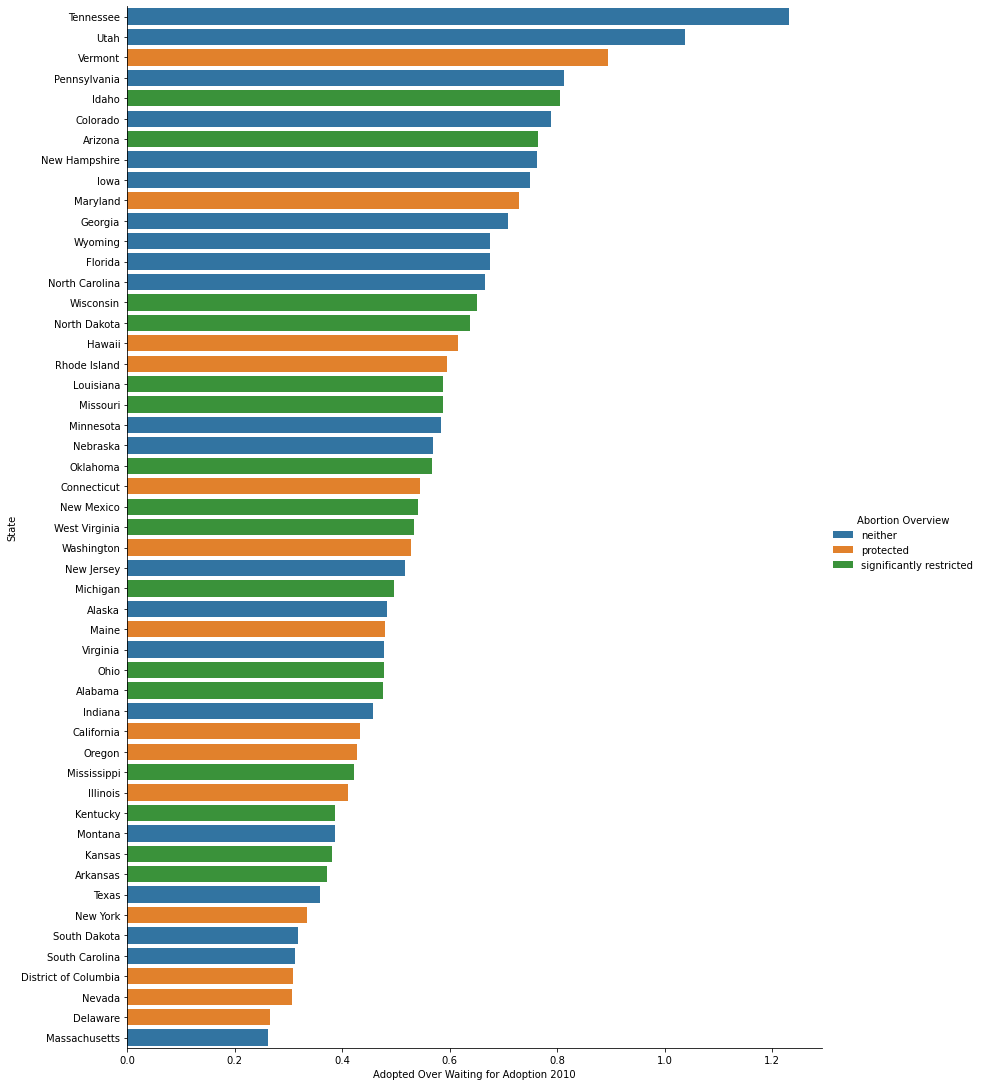

In [38]:
generatePlotOverTime("Adopted", 2010)